# ĐỒ ÁN MÔN HỌC CUỐI KÌ
 
__TÊN MÔN HỌC:__ NHẬP MÔN KHOA HỌC DỮ LIỆU

__ĐỀ TÀI:__ ÁP DỤNG MÔ HÌNH HỌC MÁY ĐỂ DỰ ĐOÁN DOANH SỐ TRÊN SÀN THƯƠNG MẠI ĐIỆN TỬ SHOPEE

__GIẢNG VIÊN:__ TRẦN TRUNG KIÊN
 
__THỨ TỰ NHÓM:__ 15
 
__THÀNH VIÊN:__

- 18120184 - Nguyễn Nguyên Khang

- 18120189 - Trần Đăng Khoa

__PHÂN CÔNG:__

Công việc | Thực hiện | Mức độ hoàn thành
------------ | ------------- | ------------
Thu thập dữ liệu | Khang |
Khám phá dữ liệu | Khang |
Tiền xử lý dữ liệu | Khang, Khoa |
Mô hình hóa dữ liệu | Khoa |

# Mục lục
- [Giới thiệu đồ án](#I.-Giới-thiệu-đồ-án)
   - [Dữ liệu](#1.-Dữ-liệu)
   - [Câu hỏi](#2.-Câu-hỏi)
- [Thu thập dữ liệu](#II.-Thu-thập-dữ-liệu)
  - [Lấy dữ liệu từ Shopee bằng API](#1.-Lấy-dữ-liệu-từ-Shopee-bằng-API)
  - [Gộp dữ liệu](#2.-Gộp-dữ-liệu)
- [Khám phá dữ liệu, tiền xử lý đơn giản và tách tập](#III.-Khám-phá-dữ-liệu,-tiền-xử-lý-đơn-giản-và-tách-tập)
  - [Kiểm tra output hợp lệ](#1.-Kiểm-tra-output-hợp-lệ)
  - [Ý nghĩa của mỗi dòng](#2.-Ý-nghĩa-của-mỗi-dòng)
  - [Kiểm tra các giá trị trùng](#3.-Kiểm-tra-các-giá-trị-trùng)   
  - [Kiểm tra các giá trị không hợp lệ](#4.-Kiểm-tra-các-giá-trị-không-hợp-lệ)
  - [Tách các tập](#5.-Tách-các-tập) 
- [Khám phá dữ liệu](#IV.-Khám-phá-dữ-liệu)
  - [Kiểm tra kiểu dữ liệu của input có phù hợp](#1.-Kiểm-tra-kiểu-dữ-liệu-của-input-có-phù-hợp)
  - [Phân bố giá trị của cột có kiểu dữ liệu dạng số](#2.-Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-dạng-số)
  - [Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số](#3.-Phân-bố-giá-trị-của-cột-có-kiểu-dữ-liệu-không-phải-dạng-số)
- [Tiền xử lý cho tập huấn luyện](#V.-Tiền-xử-lý-cho-tập-huấn-luyện)
  - [Xử lý khác biệt ngữ nghĩa do parse data từ JSON](#1.-Xử-lý-khác-biệt-ngữ-nghĩa-do-parse-data-từ-JSON)
  - [Bỏ cột](#2.-Bỏ-cột)
  - [Sửa cột](#3.-Sửa-cột)
  - [Xử lý giá trị thiếu](#4.-Xử-lý-giá-trị-thiếu)
  - [Chuẩn hóa](#5.-Chuẩn-hóa)
  - [Tạo pipeline](#6.-Tạo-pipeline)
- [Mô hình hóa dữ liệu](#VI.-Mô-hình-hóa-dữ-liệu)
  - [Tìm mô hình tốt nhất](#1.-Tìm-mô-hình-tốt-nhất)
  - [Đánh giá mô hình tìm được](#2.-Đánh-giá-mô-hình-tìm-được)
- [Nhìn lại quá trình làm đồ án](#VII.-Nhìn-lại-quá-trình-làm-đồ-án)
  - [Khó khăn](#1.-Khó-khăn)
  - [Những thứ học được](#2.-Những-thứ-học-được)
  - [Những điều cần bổ sung nếu có thêm thời gian](#3.-Những-điều-cần-bổ-sung-nếu-có-thêm-thời-gian)
- [Tài liệu tham khảo](#VIII.-Tài-liệu-tham-khảo)

In [266]:
t = ''
s = t.replace(' ', '-')
s

''

## I. Giới thiệu đồ án
### 1. Dữ liệu

Các món hàng _Thời trang nam_ trên shopee

Input là các thuộc tính của món hàng mà được biểu hiện ra trên giao diện của shopee.vn cho người dùng thấy, và thuộc tính thời gian của món hàng bao gồm: Thời gian sản phẩm được đăng, thời gian sản phẩm được lấy dữ liệu về máy, và thời gian sản phẩm được bày bán

Output là số lượng hàng đã bán được trong thời gian món hàng được đăng lên shopee cho đến lúc được lấy dữ liệu về máy

Dữ liệu đúng vì được request từ API của Shopee, có nghĩa là Shopee cũng đang sử dụng dữ liệu này để hiện thị cho người tiêu dùng xem.

### 2. Câu hỏi

*Output - doanh số -* được tính từ *input - các thông tin của sản phẩm -* theo công thức nào?

Trả lời cho câu hỏi này có ý nghĩa trong việc tìm ra cách để tăng doanh số bán được trên shopee



## Import 

import trước các thư viện re, numpy, pandas, sklearn

In [771]:
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
import time

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline
# from sklearn.cross_validation import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

#Set Option
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## II. Thu thập dữ liệu

### 1. Lấy dữ liệu từ Shopee bằng API 
Toàn bộ phần thu thập dữ liệu được nhóm đặt trong thư mục _Data Crawler_ và quá trình làm việc trong branch [_develope-Al27_](https://github.com/cstotodile/ds_final/tree/develope-Al27)

### 2. Gộp dữ liệu

Do dữ liệu thu thập được nằm ở những tập tin riêng lẻ, ta tiến hành gộp lại thành một tập dữ liệu duy nhất để khám phá

In [772]:
dataset = ['AoNganTayKhongCo', 'AoSoMi', 'BaloTuiVi', 'GiayDep', 'PhuKien', 'Quan', 'AoKhoacAoVest', 'AoNi', 'AoNganTayCoCo']
frames = [pd.read_csv(f'Data/ShopeeItem-ThoiTrangNam-{x}.tsv', sep='\t') for x in dataset]
items_df = pd.concat(frames, ignore_index=True, sort=False)

Xem kích thước của dữ liệu

In [773]:
items_df.shape

(8901, 34)

In [774]:
items_df.head()

,category_id,name,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list,historical_sold
0,8947,Áo thun phông Unisex nam nữ 2 màu Trắng Đen tay ngắn cổ tròn dáng ôm phối cực cá tính - V107,TP. Hồ Chí Minh,1.607317e+09,1.609949e+09,2632455.0,True,39%,False,8.0,False,5.000000,4.0,0.0,0.0,0.0,0.0,None,None,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,None,7.0,1048.0,4.0,True,False,8.0,0.0,18.0
1,8947,Áo Thun Trơn Nam [FREESHIP] Áo phông nam tay ngắn 100% cotton Trắng Đen dáng ôm vừa vặn AT01,TP. Hồ Chí Minh,1.596338e+09,1.609949e+09,13611374.0,True,49%,False,35.0,False,4.947977,166.0,5.0,2.0,0.0,0.0,None,None,1.090000e+10,1.090000e+10,1.090000e+10,2.150000e+10,1.090000e+10,1.090000e+10,None,109.0,10540.0,173.0,True,False,9.0,0.0,526.0
2,8947,"[SALE 50%] - Áo Thun Nam Cổ Tròn Cao Cấp ( nhiều màu) Tay Ngắn, chất cotton bề mặt vải mềm Mịn cực hot",TP. Hồ Chí Minh,1.603988e+09,1.609949e+09,5961754.0,True,50%,False,48.0,False,4.885417,89.0,4.0,2.0,1.0,0.0,None,None,4.950000e+09,9.900000e+09,4.950000e+09,9.900000e+09,4.950000e+09,9.900000e+09,None,25.0,4025.0,96.0,True,False,9.0,0.0,431.0
3,8947,Áo thun nam unisex 100% cotton basic Trắng Đen áo phông co giãn cao cấp dáng rộng dễ phối đồ - V69,TP. Hồ Chí Minh,1.596083e+09,1.609949e+09,13866721.0,True,39%,False,8.0,False,5.000000,66.0,0.0,0.0,0.0,0.0,None,None,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,1.490000e+10,2.450000e+10,None,85.0,4551.0,66.0,True,False,7.0,0.0,141.0
4,8947,🔥XẢ HÀNG🔥 Áo đôi - áo cặp nam nữ dễ thương cực HOT,Hà Nội,1.590391e+09,1.609949e+09,19558163.0,False,None,False,10.0,False,4.687500,27.0,1.0,3.0,1.0,0.0,None,None,7.200000e+09,-1.000000e+00,7.200000e+09,-1.000000e+00,7.200000e+09,0.000000e+00,None,128.0,3613.0,32.0,False,False,1.0,0.0,158.0


In [775]:
items_df['historical_sold'].skew()

21.262014975525215

In [819]:
mynp = items_df['historical_sold'].to_numpy()
mynp = mynp + 1
y = pd.Series(mynp)
mynp = np.log(mynp)
x = pd.Series(mynp)
x.describe()

count    8900.000000
mean        1.003228
std         1.844119
min         0.000000
25%         0.000000
50%         0.000000
75%         1.098612
max        10.520833
dtype: float64

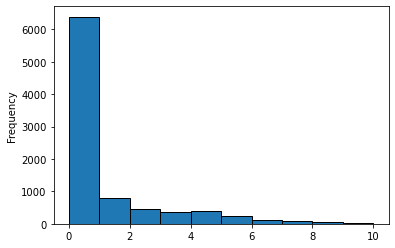

In [824]:
x.plot.hist(bins=range(0, 11, 1), edgecolor='black')

In [777]:
items_df['category_id'].unique()

array([8947, 9572, 2429, 2831, 1899, 2829, 8945, 8948])

In [778]:
items_df['historical_sold'].describe()

count     8900.000000
mean        99.855955
std        913.786549
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      37079.000000
Name: historical_sold, dtype: float64

In [779]:
items_df.dtypes

category_id                            int64
name                                  object
shop_location                         object
item_public_time                     float64
item_be_got_time                     float64
sell_time                            float64
shopee_verified                       object
discount                              object
is_adult                              object
options                              float64
show_official_shop_label_in_title     object
rating_star                          float64
five_star                            float64
four_star                            float64
three_star                           float64
two_star                             float64
one_star                             float64
flash_sale                            object
upcoming_flash_sale                   object
price_min                            float64
price_min_before_discount            float64
price_max                            float64
price_max_

Lưu file khi cần thiết

In [697]:
#items_df.to_csv('Data/ShopeeItem-ThoiTrangNam-Full.tsv', sep='\t', index=False)

## III. Khám phá dữ liệu, tiền xử lý đơn giản và tách tập

### 1. Kiểm tra output hợp lệ
Ta kiểm tra xem dữ liệu thu được có đủ điều kiện để mô hình hóa hay không? Vì đây là bài toán hồi qui nên cột output bắt buộc phải có dạng số; nếu hiện chưa có dạng số (ví dụ, số nhưng được lưu dưới dạng chuỗi) thì ta cần chuyển sang dạng số rồi mới tách các tập.

In [698]:
# Cột output hiện có kiểu dữ liệu gì?
items_df['historical_sold'].dtype

dtype('float64')

In [699]:
# Cột output có giá trị thiếu không?
items_df['historical_sold'].isna().sum()

1

In [700]:
# Xóa các mẫu có giá trị output thiếu
items_df.dropna(subset=['historical_sold'], inplace=True)

In [701]:
# Xem phân bố các giá trị của output
items_df['historical_sold'].describe()

count     8900.000000
mean        99.855955
std        913.786549
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      37079.000000
Name: historical_sold, dtype: float64

Ta có thể thấy giá trị 0 chiếm rất nhiều trong output khiến cho phân bố bị lệch rõ rệt, hãy xem có bao nhiêu giá trị 0

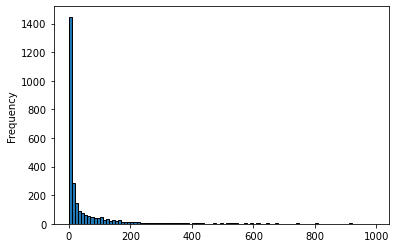

In [746]:
items_df['historical_sold'].plot.hist(bins=range(0, 1000, 10), edgecolor='black')

Để đơn giản, ta sẽ tiến hành xóa những mẫu có output bằng 0 để cho mô hình học được dự đoán khách quan hơn

In [703]:
items_df['historical_sold'] = items_df['historical_sold'].replace(0, np.nan)
items_df = items_df.dropna(how='any', axis=0, subset=['historical_sold'])

Kiểm tra lại kích thước dữ liệu

In [704]:
items_df.shape

(3018, 34)

### 2. Ý nghĩa của mỗi dòng
Quan sát sơ bộ dữ liệu và qua quá trình crawler data, ta thấy mỗi dòng chứa thông tin của một món hàng, và không có vấn đề các dòng có ý nghĩa khác nhau.

### 3. Kiểm tra các giá trị trùng
Ta xem thử có bao nhiều mẫu bị trùng giá trị

In [705]:
num_duplicated_rows = items_df.duplicated().sum()
num_duplicated_rows

29

Tiến hành xóa các mẫu trùng

In [706]:
items_df = items_df.drop_duplicates(ignore_index = True)

### 4. Kiểm tra các giá trị không hợp lệ

Thật ra giá trị của những mẫu này đều đang hoạt động bình thường trên giao diện shopee nên khả năng lỗi là rất thấp. Ta vẫn kiểm tra lại các trường hợp như sau:

1. Kiểm tra cột price_min_before_discount và cột price_max_before_discount xem có giá trị âm hay không?
  
2. So sánh price_min > price_max, price_min_before_discount > price_max_before_discount

3. So sánh price < price_before_discount, price_min < price_min_before_discount, price_max < price_max_before_discount

In [707]:
# Xử lý trường hợp 1.

invalid_price_negative = (items_df.price_min_before_discount < 0) | (items_df.price_max_before_discount < 0)
invalid_price_negative_vals = invalid_price_negative.sum()
invalid_price_negative_vals/len(items_df)

0.3017731682837069

Ta thấy có đến xấp xỉ 47.35% các giá trị `price_min_before_discount` và `price_min_before_discount` bị âm.
Do shopee vẫn hiển thị bình thường nên ta dự đoán có lẽ do tại những mẫu có giá trị âm này thì `discount` = None 

In [708]:
print((items_df.discount == 'None').sum()/len(items_df))
print((items_df.discount == 'None').sum()/len(items_df) == invalid_price_negative_vals/len(items_df))

0.3017731682837069
True


Kiểm tra thấy hai giá trị là hoàn toàn giống nhau chứng tỏ dự đoán là đúng.
Vậy code shopee chịu lỗi này hoặc đây là quy ước data của shopee, khi lấy mẫu mới về từ shopee trường hợp này vẫn sẽ là giá trị âm. Vậy nên những giá trị âm này ta xem như hợp lệ.

In [709]:
# Xử lý trường hợp 2
invalid_price_min_max = (items_df.price_min_before_discount > items_df.price_max_before_discount) | (items_df.price_max < items_df.price_min)
invalid_price_min_max_vals = invalid_price_min_max.sum()
invalid_price_min_max_vals


49

Có những mẫu bất hợp lệ trong trường hợp này, ta sẽ giữ lại những mẫu hợp lệ

In [710]:
items_df = items_df[~invalid_price_min_max]

In [711]:
# Xử lý trường hợp 3
invalid_price_before_after = (items_df.price > items_df.price_before_discount) | (items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)
invalid_price_before_after_vals = invalid_price_before_after.sum()
invalid_price_before_after_vals / len(items_df)

0.30374149659863947

Ta thấy phần trăm các giá trị lỗi giống như ở trường hợp 1 nên kiểm tra riêng lại cho điều kiện (items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)

In [712]:
print('(items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount):\n->', ((items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)).sum()/len(items_df))
print('True if it equal to (items_df.discount == "None").sum()/len(items_df))\n->', ((items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)).sum()/len(items_df) == (items_df.discount == 'None').sum()/len(items_df))

(items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount):
-> 0.30374149659863947
True if it equal to (items_df.discount == "None").sum()/len(items_df))
-> False


Có một vài mẫu bất hợp lệ, ta cũng sẽ xóa những mẫu này

In [713]:
wrong = (((items_df.price_min > items_df.price_min_before_discount) | (items_df.price_max > items_df.price_max_before_discount)) & ~(items_df.discount == 'None'))
items_df = items_df[~wrong]

Kiểm tra lại số mẫu

In [714]:
items_df.shape

(2939, 34)

### 5. Tách các tập
Vậy là dữ liệu đã sẵn sàng để tách và khám phá

In [715]:
# Tách X và y
y_sr = items_df["historical_sold"]
X_df = items_df.drop("historical_sold", axis=1)

In [716]:
# Tách train và test
rest_X_df, test_X_df, rest_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.2, random_state=0)

In [717]:
# Tách train và validation
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(rest_X_df, rest_y_sr, test_size=0.2, random_state=0)

In [718]:
train_X_df.shape

(1880, 33)

In [719]:
train_y_sr.shape

(1880,)

In [720]:
val_X_df.shape

(471, 33)

In [721]:
val_y_sr.shape

(471,)

In [722]:
test_X_df.shape

(588, 33)

In [723]:
test_y_sr.shape

(588,)

## IV. Khám phá dữ liệu

Quá trình làm việc của nhóm trong branch [Preprocessing](https://github.com/cstotodile/ds_final/tree/Preprocessing)


Xem sơ qua về dữ liệu

In [724]:
train_X_df.head()

,category_id,name,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,is_adult,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,flash_sale,upcoming_flash_sale,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,coin_earn_label,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list
767,9572,Túi Xách Thời Trang Nam Chất Liệu Da Cao Cấp Bazan_shop BZ305,TP. Hồ Chí Minh,1.557494e+09,1.609994e+09,52500320.0,False,None,False,1.0,False,5.000000,1.0,0.0,0.0,0.0,0.0,None,None,6.700000e+10,-1.000000e+00,6.700000e+10,-1.000000e+00,6.700000e+10,0.000000e+00,None,1.0,0.0,1.0,False,False,5.0,0.0
2657,8948,Áo thun nam ngắn tay có cổ hoa cúc 2 màu thời trang,TP. Hồ Chí Minh,1.596400e+09,1.610629e+09,14229292.0,True,43%,False,6.0,False,5.000000,2.0,0.0,0.0,0.0,0.0,None,None,6.900000e+09,1.200000e+10,7.900000e+09,1.200000e+10,6.900000e+09,1.200000e+10,None,1.0,69.0,2.0,False,False,2.0,0.0
2889,8948,"Áo thun có cổ thời trang nam, Mã A17 Bonstore shop",Hà Nội,1.588506e+09,1.610629e+09,22123614.0,False,28%,False,24.0,False,5.000000,1.0,0.0,0.0,0.0,0.0,None,None,7.900000e+09,1.090000e+10,7.900000e+09,1.090000e+10,7.900000e+09,1.090000e+10,None,3031.0,0.0,1.0,False,False,7.0,0.0
2880,8948,[FREESHIP - SIÊU RẺ] [HOT - NEW] Áo Đũi Nam Sang Trọng Lịch Sự Đẳng Cấp Thời Trang Nam (6 Màu) N02,Hà Nội,1.594810e+09,1.610629e+09,15819183.0,False,45%,False,24.0,False,5.000000,1.0,0.0,0.0,0.0,0.0,None,None,9.900000e+09,1.700000e+10,1.090000e+10,1.990000e+10,9.900000e+09,1.700000e+10,None,14.0,0.0,1.0,False,False,8.0,0.0
620,9572,Balo thời trang nam hàn quốc (ST399-X2),Hà Nội,1.497318e+09,1.609994e+09,112676321.0,False,None,False,1.0,False,4.615385,20.0,4.0,1.0,0.0,1.0,None,None,2.590000e+10,-1.000000e+00,2.590000e+10,-1.000000e+00,2.590000e+10,0.000000e+00,None,12170.0,8.0,29.0,False,True,6.0,0.0


### 1. Kiểm tra kiểu dữ liệu của input có phù hợp

In [725]:
train_X_df.dtypes

category_id                            int64
name                                  object
shop_location                         object
item_public_time                     float64
item_be_got_time                     float64
sell_time                            float64
shopee_verified                       object
discount                              object
is_adult                              object
options                              float64
show_official_shop_label_in_title     object
rating_star                          float64
five_star                            float64
four_star                            float64
three_star                           float64
two_star                             float64
one_star                             float64
flash_sale                            object
upcoming_flash_sale                   object
price_min                            float64
price_min_before_discount            float64
price_max                            float64
price_max_

Ta nhận thấy thuộc tính `discount` có kiểu dữ liệu không phù hợp, đáng lẽ phải ở dạng số. Ta hãy kiểm tra xem `discount` giữ những giá trị gì?

In [726]:
train_X_df['discount'].unique()

array(['None', '43%', '28%', '45%', '34%', '47%', '40%', '33%', '41%',
       '50%', '24%', '46%', '44%', '30%', '36%', '35%', '19%', '20%',
       '42%', '38%', '14%', '48%', '26%', '22%', '27%', '49%', '39%',
       '1%', '21%', '12%', '18%', '31%', '8%', '25%', '10%', '7%', '23%',
       '16%', '2%', '5%', '6%', '37%', '15%', '32%', '29%', '11%', '61%',
       '3%', '9%', '70%', '17%', '13%', '51%', '56%', '87%', '4%', '53%',
       '60%'], dtype=object)

### 2. Phân bố giá trị của cột có kiểu dữ liệu dạng số

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Kết quả được lưu vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `train_X_df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" 

In [727]:
num_cols = ['item_public_time','item_be_got_time', 'sell_time', 'discount', 
            'options', 'rating_star' ,'five_star', 'four_star', 'three_star', 
            'two_star' ,'one_star' ,'price_min_before_discount', 'price_max', 'price_min', 
            'price_max_before_discount', 'price', 'price_before_discount', 
            'liked_count', 'view_count', 'cmt_count','images', 'video_info_list']
cat_cols = list(set(train_X_df.columns) - set(num_cols))

In [728]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)
df = train_X_df[num_cols]
num_col_info_df = df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
num_col_info_df

,item_public_time,item_be_got_time,sell_time,discount,options,rating_star,five_star,four_star,three_star,two_star,one_star,price_min_before_discount,price_max,price_min,price_max_before_discount,price,price_before_discount,liked_count,view_count,cmt_count,images,video_info_list
missing_ratio,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
min,1.439048e+09,1.609910e+09,-1.504762e+09,1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.000000e+00,3.900000e+08,3.900000e+08,-2.000000e+00,3.900000e+08,0.000000e+00,0.0,0.0,0.0,1.0,0.0
lower_quartile,1.558220e+09,1.609917e+09,1.273699e+07,NaN,4.0,4.5,1.0,0.0,0.0,0.0,0.0,-1.000000e+00,8.500000e+09,7.900000e+09,-1.000000e+00,7.900000e+09,0.000000e+00,2.0,7.0,1.0,5.0,0.0
median,1.582499e+09,1.609992e+09,2.771766e+07,NaN,9.0,4.9,3.0,0.0,0.0,0.0,0.0,1.390000e+10,1.290000e+10,1.245000e+10,1.400000e+10,1.250000e+10,1.390000e+10,13.0,52.0,3.0,8.0,0.0
upper_quartile,1.597409e+09,1.610610e+09,5.194715e+07,NaN,16.0,5.0,16.0,1.0,0.0,0.0,0.0,2.200000e+10,1.980000e+10,1.950000e+10,2.250000e+10,1.950000e+10,2.200000e+10,370.0,260.5,18.0,9.0,0.0
max,3.115373e+09,1.610629e+09,1.715812e+08,None,55.0,5.9,7257.0,708.0,353.0,144.0,264.0,1.317000e+11,2.350000e+11,2.350000e+11,1.317000e+11,2.350000e+11,1.317000e+11,79919.0,189252.0,8723.0,9.0,1.0


### 3. Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 

- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu)

- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

Kết quả được lưu vào DataFrame `cat_col_info_df`, trong đó: 

- Tên của các cột là tên của các cột không phải số trong `train_X_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

In [729]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df = train_X_df[cat_cols]
cat_col_info_df = df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

coin_earn_label upcoming_flash_sale         show_free_shipping            shopee_verified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              shop_location                                                                                     category_id  \
missing_ratio                0                   0                          0                          0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          0                                                                                               0   
num_values                   1                   1                          2                          2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         36                                                                                               8   
value_ratios   {'None': 100.0}     {'None': 100.0}  {False: 52.5, True: 47.5}  {False: 57.0, True: 43.0}  {'Hà Nội': 47.8, 'TP. Hồ Chí Minh': 26.6, 'Nước ngoài': 17.1, 'None': 1.2, 'Quảng Ninh': 0.9, 'Hà Nam': 0.7, 'Bình Dương': 0.6, 'Bình Định': 0.6, 'Đồng Nai': 0.5, 'Phú Thọ': 0.5, 'TP. Hồ Chí': 0.4, 'Lào Cai': 0.3, 'Hà ': 0.3, 'Hải Phòng': 0.3, 'Thái Bình': 0.2, 'Kon Tum': 0.2, 'Thái Nguyên': 0.2, 'Bắc Ninh': 0.2, 'Nước n': 0.2, 'Nam Định': 0.2, 'Nghệ An': 0.1, 'Thừa Thiên Huế': 0.1, 'Vĩnh Phúc': 0.1, 'Thanh Hóa': 0.1, 'An Giang': 0.1, 'Cần Thơ': 0.1, 'Hải Dương': 0.1, 'Hưng Yên': 0.1, 'Bắc Giang': 0.1, 'Tiền Giang': 0.1, 'Bà Rịa - Vũng Tàu': 0.1, 'Cà Mau': 0.1, 'Đà Nẵng': 0.1, 'Lâm Đồng': 0.1, 'Đắk Lắk': 0.1, 'Đắk Nông': 0.1}  {2429: 18.6, 8947: 18.2, 8948: 16.5, 1899: 16.3, 9572: 10.6, 2831: 10.3, 2829: 6.6, 8945: 2.8}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

## V. Tiền xử lý cho tập huấn luyện

### 1. Xử lý khác biệt ngữ nghĩa do parse data từ JSON

Do dữ liệu trả về từ API của shopee, những dữ liệu thiếu có dạng string: 'None' nên pandas sẽ không đếm được lượng dữ liệu không có giá trị này. Ta tiến hành thay 'None' thành np.nan để có thể đếm lượng dữ liệu thiếu này chính xác.

### 2. Bỏ cột

Ta sẽ tiến hành bỏ những cột sau:
- `name`: do quá nhiều giá trị
- `is_adult`: giá trị False chiếm 100%
- `flash_sale`, `upcoming_flash_sale`, `coin_earn_label`: Thiếu 100% giá trị

### 3. Sửa cột
Ta tiến hành sửa những cột sau: 
- `shop_location`: ta thấy có khá nhiều giá trị khác nhau trong tập huấn luyện (46 giá trị), trong đó có các giá trị chỉ xuất hiện một hoặc một ít lần; nếu ta để nguyên thì khi chuyển sang dạng số bằng phương pháp one-hot sẽ có nhiều cột → dễ bị overfit. Ta sẽ xử lý vấn đề này như sau: chỉ lấy 3 location có giá trị xuất hiện nhiều nhất, các giá trị còn lại sẽ được thay thế bằng giá trị "Others". Ngoài ra, thuộc tính shop_location cũng có giá trị thiếu, lưu ý rằng các dữ liệu này vẫn hoạt động tốt trên Shopee nên ta dùng lệnh sau để xem những mẫu nào bị _thiếu_ và đối chiếu với trên shopee.

Sau khi đối chiếu ta được kết quả sau: 

Mẫu không thiếu:

![shop_location_not_missing_value](images/shop_location_not_missing_value.jpg)

Mẫu thiếu:

![shop_location_missing_value](images/shop_location_missing_value.jpg)

Tức là những mẫu có thuộc tính shop_location thiếu sẽ không hiển thị vị trí shop ở góc dưới.

Vậy ta sẽ xử lý bằng cách thay các giá trị thiếu này thành chuỗi "None".

- `discount`: có thêm kí tự % đằng sau nên có kiểu chuỗi, vậy ta sẽ tách số ra đó và chuyển thành số. Ngoài ra, ta còn thấy `discount` có giá trị thiếu. Kiểm tra đối chiếu với các item trên Shopee, ta thấy thực tế những mẫu bị _thiếu_ dữ liệu ở thuộc tính discount là do không có giảm giá (discount = 0). Ta tiến hành sửa bằng cách thay giá trị nan tại cột này thành 0.

- `shopee_verified`, `show_official_shop_label_in_title`, `is_preferred_plus_seller`, `show_free_shipping`: những cột kiểu bool như này thì ta chuyển hết về 0 và 1, riêng `show_official_shop_label_in_title` vừa có kiểu bool vừa có kiểu string nên ta xử lý đặc biệt hơn


Class ColAdderDropper sẽ thực hiện các bước trên.

In [730]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_location=3):
        self.num_top_location = num_top_location
    def fit(self, X_df, y=None):
        location_col = X_df['shop_location']
        self.location_counts_ = location_col.value_counts()
        locations = list(self.location_counts_.index)
        self.top_locations_ = locations[:max(1, min(self.num_top_location, len(locations)))]
        return self
    def transform(self, X_df, y=None):
        # YOUR CODE HERE
        tf_df = X_df.copy()
        # Bước 1
        tf_df = tf_df.replace('None', np.nan)
        # Bước 2
        tf_df = tf_df.drop(['name', 'is_adult', 'flash_sale', 'upcoming_flash_sale', 'coin_earn_label'], axis=1)
        # Bước 3
        tf_df['shop_location'] = tf_df['shop_location'].replace(np.nan, 'None')
        locations = list(tf_df['shop_location'].value_counts().index)
        top_locations = ['Hà Nội', 'Nước ngoài', 'TP. Hồ Chí Minh']
        other_locations = list(set(locations) - set(top_locations))
        tf_df['shop_location'] = tf_df['shop_location'].replace(other_locations, 'Others')
        
        tf_df['discount'] = tf_df['discount'].replace(np.nan, 0)
        
        def apply_discount(discount):
            if type(discount) == int:
                return discount
            else:
                result = re.findall(r'\d+',discount)
                return result[0]
            pass

        tf_df['discount'] = tf_df.apply(lambda row: apply_discount(row['discount']), axis=1)
        
        def convert_col_dtype(col):
            if col.name in ['discount']:
                return pd.to_numeric(col, errors='coerce')
            return col

        tf_df = tf_df.apply(convert_col_dtype)
        

        def apply_bool(FalseOrTrue):
            if FalseOrTrue is np.nan:
                return FalseOrTrue
            if FalseOrTrue == 'False' or FalseOrTrue == False:
                return 0
            if FalseOrTrue == 'True' or FalseOrTrue == True:
                return 1
            else:
                return FalseOrTrue
            pass

        tf_df['show_official_shop_label_in_title'] = tf_df.apply(lambda row: apply_bool(row['show_official_shop_label_in_title']), axis=1)
        tf_df['is_preferred_plus_seller'] = tf_df.apply(lambda row: apply_bool(row['is_preferred_plus_seller']), axis=1)
        tf_df['shopee_verified'] = tf_df.apply(lambda row: apply_bool(row['shopee_verified']), axis=1)
        tf_df['show_free_shipping'] = tf_df.apply(lambda row: apply_bool(row['show_free_shipping']), axis=1)
        return tf_df
        #raise NotImplementedError()

In [731]:
# Test
col_adderdropper = ColAdderDropper()
fewer_cols_train_X_df = col_adderdropper.fit_transform(train_X_df)
fewer_cols_train_X_df

,category_id,shop_location,item_public_time,item_be_got_time,sell_time,shopee_verified,discount,options,show_official_shop_label_in_title,rating_star,five_star,four_star,three_star,two_star,one_star,price_min,price_min_before_discount,price_max,price_max_before_discount,price,price_before_discount,liked_count,view_count,cmt_count,is_preferred_plus_seller,show_free_shipping,images,video_info_list
767,9572,TP. Hồ Chí Minh,1.557494e+09,1.609994e+09,52500320.0,0,0,1.0,0.0,5.000000,1.0,0.0,0.0,0.0,0.0,6.700000e+10,-1.000000e+00,6.700000e+10,-1.000000e+00,6.700000e+10,0.000000e+00,1.0,0.0,1.0,0,0,5.0,0.0
2657,8948,TP. Hồ Chí Minh,1.596400e+09,1.610629e+09,14229292.0,1,43,6.0,0.0,5.000000,2.0,0.0,0.0,0.0,0.0,6.900000e+09,1.200000e+10,7.900000e+09,1.200000e+10,6.900000e+09,1.200000e+10,1.0,69.0,2.0,0,0,2.0,0.0
2889,8948,Hà Nội,1.588506e+09,1.610629e+09,22123614.0,0,28,24.0,0.0,5.000000,1.0,0.0,0.0,0.0,0.0,7.900000e+09,1.090000e+10,7.900000e+09,1.090000e+10,7.900000e+09,1.090000e+10,3031.0,0.0,1.0,0,0,7.0,0.0
2880,8948,Hà Nội,1.594810e+09,1.610629e+09,15819183.0,0,45,24.0,0.0,5.000000,1.0,0.0,0.0,0.0,0.0,9.900000e+09,1.700000e+10,1.090000e+10,1.990000e+10,9.900000e+09,1.700000e+10,14.0,0.0,1.0,0,0,8.0,0.0
620,9572,Hà Nội,1.497318e+09,1.609994e+09,112676321.0,0,0,1.0,0.0,4.615385,20.0,4.0,1.0,0.0,1.0,2.590000e+10,-1.000000e+00,2.590000e+10,-1.000000e+00,2.590000e+10,0.000000e+00,12170.0,8.0,29.0,0,1,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2429,Hà Nội,1.516205e+09,1.609917e+09,93712898.0,1,41,5.0,0.0,4.454545,9.0,0.0,1.0,0.0,1.0,9.500000e+09,1.600000e+10,9.500000e+09,1.600000e+10,9.500000e+09,1.600000e+10,24.0,36.0,12.0,0,1,6.0,0.0
1404,2429,Nước ngoài,1.585890e+09,1.609917e+09,24027543.0,0,43,18.0,0.0,3.666667,2.0,0.0,0.0,0.0,1.0,2.350000e+10,4.100000e+10,2.350000e+10,4.100000e+10,2.350000e+10,4.100000e+10,21.0,49.0,3.0,0,0,6.0,0.0
1698,1899,Hà Nội,1.566622e+09,1.609992e+09,43369594.0,1,38,4.0,0.0,4.853350,1425.0,107.0,35.0,5.0,11.0,1.240000e+10,2.000000e+10,1.240000e+10,2.000000e+10,1.240000e+10,2.000000e+10,615.0,12723.0,1583.0,0,1,9.0,1.0
1917,1899,TP. Hồ Chí Minh,1.555219e+09,1.609992e+09,54773300.0,0,0,5.0,0.0,5.000000,1.0,0.0,0.0,0.0,0.0,1.620000e+10,-1.000000e+00,1.620000e+10,-1.000000e+00,1.620000e+10,0.000000e+00,36.0,10.0,1.0,0,0,2.0,0.0


In [732]:
# Kiểm tra các giá trị không phải số đã được xử lý đúng chưa
cat_cols = list(set(fewer_cols_train_X_df.columns) - set(num_cols))
df = fewer_cols_train_X_df[cat_cols]
cat_col_info_df = df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,show_free_shipping,shopee_verified,shop_location,category_id,show_official_shop_label_in_title,is_preferred_plus_seller
missing_ratio,0,0,0,0,1.6,0
num_values,2,2,4,8,2,2
value_ratios,"{0: 52.5, 1: 47.5}","{0: 57.0, 1: 43.0}","{'Hà Nội': 47.8, 'TP. Hồ Chí Minh': 26.6, 'Nước ngoài': 17.1, 'Others': 8.5}","{2429: 18.6, 8947: 18.2, 8948: 16.5, 1899: 16.3, 9572: 10.6, 2831: 10.3, 2829: 6.6, 8945: 2.8}","{0.0: 94.8, 1.0: 5.2}","{0: 92.8, 1: 7.2}"


### 4. Xử lý giá trị thiếu
- Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột dạng số trong tập huấn luyện, ta đều cần tính mean, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới. 
- Với các cột không phải dạng số và không có thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột <font color=gray>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột không có dạng số và không có thứ tự, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot <font color=gray>(gợi ý: dùng `OneHotEncoder` trong Sklearn, để ý tham số `handle_unknown` vì khi dự đoán với các véc-tơ input mới ...)</font>.
- Với cột không phải dạng số và có thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột.
    - Các giá trị của cột này đều là kiểu boolean và ta đã chuyển sang dạng 0, 1 trước đó nên không cần phải mã hóa nữa

In [733]:
nume_cols = ['item_public_time','item_be_got_time', 'sell_time', 'discount', 
            'options', 'rating_star' ,'five_star', 'four_star', 'three_star', 
            'two_star' ,'one_star' ,'price_min_before_discount', 'price_max', 'price_min', 
            'price_max_before_discount', 'price', 'price_before_discount', 
            'liked_count', 'view_count', 'cmt_count','images', 'video_info_list']
unorder_cate_cols = ['category_id', 'shop_location']
order_cate_cols = ['is_preferred_plus_seller', 'shopee_verified', 'show_free_shipping', 'show_official_shop_label_in_title']
# YOUR CODE HERE
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
enc = OneHotEncoder(handle_unknown='ignore')
unorder_cate_pipeline = make_pipeline(imp_mode, enc)
column_transformer = ColumnTransformer(transformers = [('numerical', imp_mean, nume_cols),
                                                      ('unorder_categorical', unorder_cate_pipeline, unorder_cate_cols),
                                                      ('order_categorical', imp_mode, order_cate_cols)], remainder='passthrough')

### 5. Chuẩn hóa
Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa bằng cách trừ đi mean và chia cho độ lệch chuẩn của cột để giúp cho các thuật toán cực tiểu hóa như Gradient Descent, LBFGS, ... hội tụ nhanh hơn 

### 6. Tạo pipeline

Khi đã có những bước tiền xử lý cụ thể, ta sẽ tạo pipeline chứa chúng để cho quá trình tiền xử lý và mô hình hóa được dễ dàng hơn

In [734]:
preprocess_pipeline = make_pipeline(ColAdderDropper(), column_transformer,  StandardScaler())

In [735]:
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

In [736]:
preprocessed_train_X.shape

(1880, 38)

In [737]:
preprocessed_val_X.shape

(471, 38)

## VI. Mô hình hóa dữ liệu

### 1. Tìm mô hình tốt nhất

Do output là kiểu số thực liên tục nên ta sẽ sử dụng mô hình hồi quy để dự đoán các input mới, ta sẽ sử dụng các model đã được học sau:

- Hồi quy tuyến tính
- Mạng neural nhân tạo


Đầu tiên, đối với các mô hình hồi quy này thì ta sử dụng độ đo $R^2$ để đánh giá độ lỗi vì độ đo MSE không cho ta biết được cụ thể chất lượng của mô hình 

$R^2$ bình phương cho biết độ phù hợp của mô hình, người ta nghiên cứu được rằng, với $R^2$ bình phương > 0.5 thì một mô hình được đánh giá là phù hợp.

#### Huấn luyện mô hình hồi quy tuyến tính 

In [742]:
full_pipeline = make_pipeline(ColAdderDropper(), column_transformer, StandardScaler(), LinearRegression())
full_pipeline.fit(train_X_df, train_y_sr)
full_pipeline.score(val_X_df, val_y_sr)

0.8672210625024007

In [743]:
full_pipeline.score(train_X_df, train_y_sr)

0.7941676075432698

Ta thấy $R^2$ khá thấp, có lẽ dữ liệu không có nhiều sự tương quan tuyến tính

In [739]:
from sklearn.ensemble import RandomForestRegressor

In [744]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
full_pipeline = make_pipeline(ColAdderDropper(), column_transformer, StandardScaler(), regr)
full_pipeline.fit(train_X_df, train_y_sr)
full_pipeline.score(val_X_df, val_y_sr)

0.7401234813395222

In [745]:
full_pipeline.score(train_X_df, train_y_sr)

0.8231918250400294

#### Huấn luyện mô hình mạng neural nhân tạo

Ta sẽ thử 5 x 5 = 25 mô hình với các tham số khác nhau (fit khá lâu do khó hội tụ). 

Các tham số thay đổi:
- `alpha`: 0.001, 0.1, 1, 10, 100
- `hidden_layer_sizes`: 10, 20, 30, 40, 50

Các tham số được cố định:
- `activation`: `relu`
- `solver`: `adam`: Do dữ liệu rất nhiều và không có hệ thống nên sử dụng thuật toán adam rất hiệu quả (theo scikit-learn)
- `max_iter`: 10000: Để cho thuật toán được hội tụ, nếu set quá thấp sẽ không đủ lần lặp để hội tụ

In [633]:
mlp = MLPRegressor(hidden_layer_sizes=(40), activation='tanh', solver='adam', random_state=0, max_iter=20000)
sgd = SGDRegressor(penalty='l1', random_state=0)
full_pipeline = make_pipeline(ColAdderDropper(), column_transformer, StandardScaler(), mlp)
alphas = [0.001]
train_rr = []
val_rr = []
best_val_rr = -float('inf'); best_alpha = None;
for alpha in alphas:
    full_pipeline.set_params(mlpregressor__alpha=alpha)
    t0 = time.time()
    full_pipeline.fit(train_X_df, train_y_sr)
    t1 = time.time()
    print(t1 - t0)
    train_rr.append(full_pipeline.score(train_X_df, train_y_sr))
    val_rr.append(full_pipeline.score(val_X_df, val_y_sr))
    if val_rr[-1] > best_val_rr:
        best_val_rr, best_alpha = val_rr[-1], alpha

/home/khoa/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


7.501329183578491


In [634]:
val_rr

[-0.027444920906710246]

In [635]:
best_val_rr

-0.027444920906710246

In [636]:
best_alpha

0.001

Như vậy $R^2$ > 0.5, mô hình này có thể phù hợp để dự đoán các dữ liệu mới.


Cuối cùng, ta sẽ huấn luyện lại `full_pipeline` trên `rest_X_df` và `rest_y_sr` (tập huấn luyện + tập validation) với `best_alpha` và `best_layer` tìm được ở trên để ra được mô hình cụ thể cuối cùng.

In [637]:
full_pipeline = make_pipeline(ColAdderDropper(), column_transformer, StandardScaler(), MLPRegressor(alpha=best_alpha, hidden_layer_sizes=best_layer,
                                                               activation='relu', solver='adam', random_state=0, max_iter=10000))
full_pipeline.fit(rest_X_df, rest_y_sr)

NameError: name 'best_layer' is not defined

### 2. Đánh giá mô hình tìm được

Sau khi đã có mô hình tốt nhất fit vào tập train, ta sẽ dùng mô hình đó để dự đoán tập test cuối cùng

## VII. Nhìn lại quá trình làm đồ án

### 1. Khó khăn

### 2. Những thứ học được

### 3. Những điểu cần bổ sung nếu có thêm thời gian

## VIII. Tài liệu tham khảo